# Getting your hands dirty with LDA (Using the Foursquare API)

First things first, we want to develop a classifier that can detect if a user comment is misapplied to the venue. Think of all the times you've gone to an Amazon item and saw reviews that looked like the image below, "Used but in very good condition", "fast shipping" are these relevant to a product review? Or are they more appropriate for seller reviews? 

We're going to see if we can develop a comment classifier to detect which kinds of comments may be more appropriate for which venue type, and thus provide some indication on the "appropriateness" of the comment that can be used for further review, thus (we hope), improving the overall quality of Foursquare as a reviews platform

How do we plan on doing this? First, this lab will finally utilize a multi-class target. In this case, our goal will be to link comments we've extracted from Foursquare to store category type. 

As an example: "This place got me drunk" would be a comment you'd expect to see for a store category "bar" 
Yet, "I want to have my wedding here" is definitely not a comment you'd expect to see at a "bar" category (lest you live in Boston), more likely you'd see such a category associated with a park, or other such venue. 

The motivation for this exercise came from Amazon. Notice in the picture below, you see some comments that are speaking about the "condition" of the DVD and not the quality of the movie. These are an example of misapplied comments. I'm not promising our classifier will be this exact, but what we'll be doing is a big step in that direction. Excited? Good! Let's go!


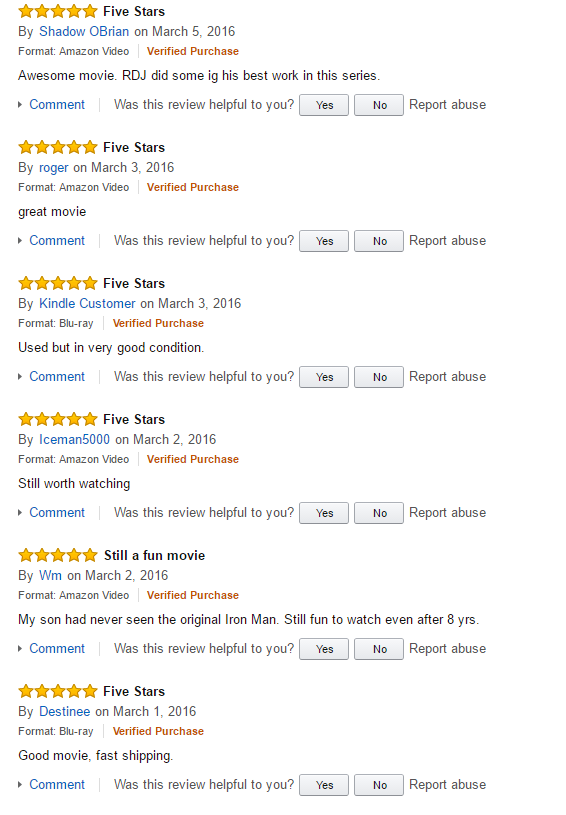

In [82]:
from IPython.display import Image
Image('F:/test/amazon_image.png')

Use the previously built table-creator on a few categories of Foursquare venues. 

Find the category list code in the following page: https://developer.foursquare.com/categorytree

In [2]:
import foursquare
import json
import pandas as pd
import unicodedata


#ACCESS_TOKEN = ""
#client = foursquare.Foursquare(access_token=ACCESS_TOKEN)


CLIENT_ID = 'XUHWF1ZUWABMOAHGLO2QNNWED1XCL3NH1PT0IIUODMJL43EY'
CLIENT_SECRET = '3TJWM15OHXWDHRI0XZ3QZEV31TXFCQK3FPXZC0UGZ4NQPPMK'
client = foursquare.Foursquare(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)



Load up the data we used previously, and use your scraper code to build your Foursquare table. We're going to do something a little different here. First, go into the category list https://developer.foursquare.com/categorytree and a category that will give you an at least 4 - 6 different store categories. You can experiment by inputting the categoryid into the starting list generator and then running the scraper code, then 'eye-balling' the store category section to see there are at least 4 - 6 different categories. 

If the category you selected does not have enough categories, you may have to either pick another, pull in multiple categories or merge.


In [28]:
starting_list = client.venues.search(params={'near': 'Sydney, NSW', 'radius':'2000'})
starting_list

{u'confident': True,
 u'geocode': {u'feature': {u'cc': u'AU',
   u'displayName': u'Sydney, NSW, Australia',
   u'geometry': {u'bounds': {u'ne': {u'lat': -33.37850601479644,
      u'lng': 151.34320099544556},
     u'sw': {u'lat': -34.18942992635369, u'lng': 150.58820004399706}},
    u'center': {u'lat': -33.86785, u'lng': 151.20732}},
   u'highlightedName': u'<b>Sydney</b>, <b>NSW</b>, Australia',
   u'id': u'geonameid:2147714',
   u'longId': u'72057594040075650',
   u'matchedName': u'Sydney, NSW, Australia',
   u'name': u'Sydney',
   u'slug': u'sydney',
   u'woeType': 7},
  u'parents': [],
  u'what': u'',
  u'where': u'sydney nsw'},
 u'venues': [{u'allowMenuUrlEdit': True,
   u'beenHere': {u'lastCheckinExpiredAt': 0,
    u'marked': False,
    u'unconfirmedCount': 0},
   u'categories': [{u'icon': {u'prefix': u'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
      u'suffix': u'.png'},
     u'id': u'4bf58dd8d48988d1fa931735',
     u'name': u'Hotel',
     u'pluralName': u'Hotels',
  

In [29]:
venue_table = pd.DataFrame()
for v_index in range(len(starting_list['venues'])-1):
    temp = unicodedata.normalize('NFKD', starting_list['venues'][v_index]['id']).encode('ascii','ignore')
    temp1 = client.venues(temp)
    print v_index
    comment_list = map(lambda h: h['text'], temp1['venue']['tips']['groups'][0]['items'])
    for c_index in range(len(comment_list)-1):
        print c_index
        comment_converter = unicodedata.normalize('NFKD', comment_list[c_index]).encode('ascii','ignore')
        print "test"
        if (starting_list['venues'][v_index]['categories']) != []:  
            venue_table = venue_table.append(pd.DataFrame({"name": unicodedata.normalize('NFKD', starting_list['venues'][v_index]['name']).encode('ascii','ignore'),
                                            "tip count": starting_list['venues'][v_index]['stats']['tipCount'],
                                            "users count": starting_list['venues'][v_index]['stats']['usersCount'],
                                            "store category": unicodedata.normalize('NFKD', starting_list['venues'][v_index]['categories'][0]['name']).encode('ascii','ignore'),  
                                            #"store category": 'No ID', 
                                            "comments": comment_converter}, index = [v_index + c_index]))
        else:
            venue_table = venue_table.append(pd.DataFrame({"name": unicodedata.normalize('NFKD', starting_list['venues'][v_index]['name']).encode('ascii','ignore'),
                                            "tip count": starting_list['venues'][v_index]['stats']['tipCount'],
                                            "users count": starting_list['venues'][v_index]['stats']['usersCount'],
                                            "store category": unicodedata.normalize('NFKD', starting_list['venues'][v_index]['categories'][0]['name']).encode('ascii','ignore'),  
                                             "comments": comment_converter}, index = [v_index + c_index]))


0
0
test
1
test
2
test
3
test
4
test
5
test
6
test
7
test
8
test
9
test
10
test
11
test
12
test
13
test
14
test
15
test
16
test
17
test
18
test
1
0
test
1
test
2
test
3
test
4
test
5
test
6
test
7
test
8
test
9
test
10
test
11
test
2
0
test
1
test
2
test
3
test
4
test
5
test
6
test
7
test
8
test
9
test
10
test
11
test
12
test
13
test
14
test
15
test
16
test
17
test
18
test
3
0
test
1
test
4
0
test
1
test
2
test
3
test
4
test
5
test
6
test
7
test
8
test
9
test
10
test
11
test
12
test
13
test
14
test
15
test
16
test
17
test
18
test
5
0
test
1
test
6
7
0
test
1
test
8
9
10
0
test
1
test
2
test
3
test
4
test
5
test
6
test
7
test
8
test
9
test
10
test
11
test
12
test
13
test
14
test
15
test
16
test
11
0
test
1
test
2
test
12
13
0
test
1
test
2
test
3
test
4
test
5
test
6
test
14
15
0
test
1
test
2
test
3
test
4
test
5
test
16
0
test
1
test
2
test
3
test
4
test
5
test
6
test
7
test
8
test
9
test
10
test
11
test
17
0
test
1
test
2
test
3
test
4
test
5
test
6
test
7
test
8
test
9
test
10
test


In [30]:
venue_table['store category'].unique()

array(['Hotel', 'Tech Startup', 'City', 'Hotel Bar', 'Plaza',
       'Post Office', 'Neighborhood', 'Platform', 'Boutique',
       'Italian Restaurant', 'Food Court', 'Concert Hall', 'Bar',
       'Salad Place', 'Gym', 'Financial or Legal Service'], dtype=object)

In [31]:
# I just re-run the table maker once I change the category id for the 2nd category code

# Note: Sports bar : 4bf58dd8d48988d11d941735
# Note: Seafood Rest.: 4bf58dd8d48988d1ce941735
# Note: Winery : 4bf58dd8d48988d14b941735
# Note: Liquor Store : 4bf58dd8d48988d186941735


# change the categoryid for each type and define 


In [30]:
# This code is commented for the instructor to show what a multiple table merge may look like:

#venue_table_1 = venue_table.drop_duplicates(); 
#venue_table_2 = venue_table.drop_duplicates(); 
#venue_table_3 = venue_table.drop_duplicates(); 
#venue_table_4 = venue_table.drop_duplicates(); 
#venue_table_5 = venue_table.drop_duplicates(); 
#len(venue_table_no_dupe)
#len(venue_table_2)


Be sure to remove all duplicates, and merge all your dataframes into one data frame for analysis 



In [32]:
venue_table = venue_table.drop_duplicates()

# Constructing features using string parsing and elementary text mining

Create a normalizer function that will take the comments, lowercase all uppercase letters, split each comment into an array/list/vector of words, and remove stop words. 

In [35]:
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3            
import numpy as np

stopwords = nltk.corpus.stopwords.words('english')

In [45]:
type(stopwords)

list

Write a normalizing method, one that will convert all letters in a string into lower case, and remove stopwords. 

A helpful references: https://docs.python.org/2/library/re.html

In [83]:
comment = 'The Jeep ran with his limb.'
tokenized = nltk.word_tokenize(comment)

In [121]:
def normalizer(comment):
    tokenized = nltk.word_tokenize(comment)
    astring = ''

    for word in tokenized:
        substring = ''
        if word in stopwords:
            continue
        elif word in ['.', '?', ',']:
            continue
        else:
            substring += word.lower() + ' '
        astring += substring + ' '

    return astring

Test out your normalizer on a comment to ensure it's working. 

In [122]:
normalizer(comment)

'the  jeep  ran  limb  '

In [123]:
normalized_comments = venue_table.comments.apply(normalizer)

Use the normalizer that you created to build a 'stripped' down comments array/vector/list (however you did it)

Vectorize your feature set into a dense matrix representation using Countvectorizer from sklearn

A helpful reference: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [124]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [125]:
countv = CountVectorizer()
words_array = countv.fit_transform(normalized_comments)
feature_names = countv.get_feature_names()
words_array.shape

(150, 813)

In [128]:
venue_table.shape

(150, 5)

In [130]:
venue_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 22
Data columns (total 5 columns):
comments          150 non-null object
name              150 non-null object
store category    150 non-null object
tip count         150 non-null int64
users count       150 non-null int64
dtypes: int64(2), object(3)
memory usage: 7.0+ KB


# Performing the LDA

Construct your LDA with the pieces above by fitting the model to your feature set and target

In [126]:
import scipy
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [134]:
X = words_array.toarray()
y = venue_table['store category']

In [142]:
lda = LDA(n_components=2)
components = lda.fit_transform(X, y)

# Visualizing Results

Now print the LDA and at least a few of the categories on a 2-D discriminant chart. Do you think the method is seperating the categories very well? Should we tune it more? Would it be a good indicator of "inappropriate commenting"? 

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/allenbyron/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/Users/allenbyron/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/Users/allenbyron/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/Users/allenbyron/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was se

In [153]:
LDA1 = components[0:,0]
LDA2 = components[0:,1]

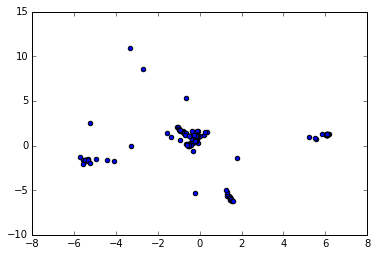

In [156]:
plt.scatter(LDA1, LDA2, cmap=)
plt.show()

In [155]:
plt.scatter?